In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import cv2
import seaborn as sns


In [ ]:
# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
DATADIR = "/content/drive/MyDrive/All_Dataset_Folder/Skin cancer ISIC"
CATEGORIES = ["basal cell carcinoma", "melanoma", "squamous cell carcinoma"]
IMG_SIZE=150

In [ ]:
basal_cell_carcinoma_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[0]}')]
melanoma_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[1]}')]
squamous_cell_carcinoma_imgs = [fn for fn in os.listdir(f'{DATADIR}/{CATEGORIES[2]}')]

select_basal_cell_carcinoma = np.random.choice(basal_cell_carcinoma_imgs, 3, replace = False)
select_melanoma = np.random.choice(melanoma_imgs, 3, replace = False)
select_squamous_cell_carcinoma = np.random.choice(squamous_cell_carcinoma_imgs, 3, replace = False)

In [ ]:
basal_cell_carcinoma_imgs[3]

'ISIC_0024432.jpg'

In [ ]:
melanoma_imgs[3]

'ISIC_0000013.jpg'

In [ ]:
squamous_cell_carcinoma_imgs[3]

'ISIC_0011751.jpg'

In [ ]:
type(select_basal_cell_carcinoma)

numpy.ndarray

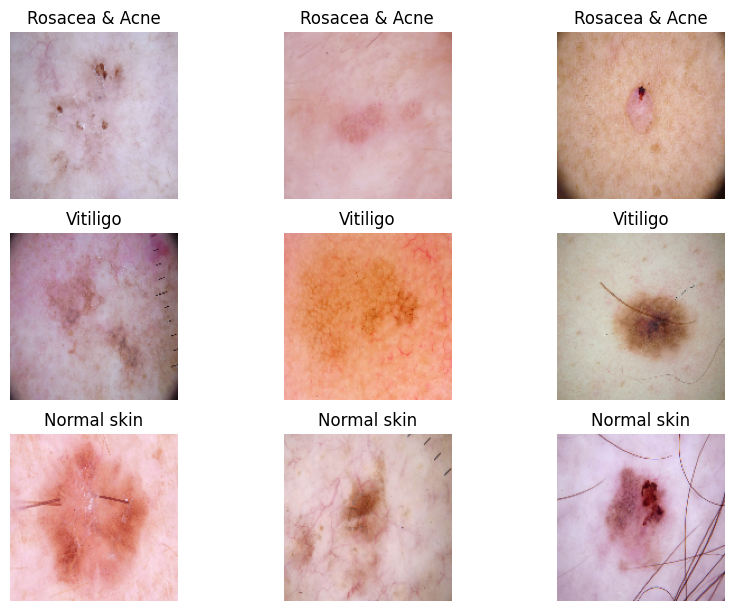

In [ ]:
fig = plt.figure(figsize = (10,10))
for i in range(9):
    if i < 3:
        fp = f'{DATADIR}/{CATEGORIES[0]}/{select_basal_cell_carcinoma[i]}'
        label = 'basal cell carcinoma'
    if i>=3 and i<6:
        fp = f'{DATADIR}/{CATEGORIES[1]}/{select_melanoma[i-3]}'
        label = 'melanoma'
    if i>=6 and i<9:
        fp = f'{DATADIR}/{CATEGORIES[2]}/{select_squamous_cell_carcinoma[i-6]}'
        label = 'squamous cell carcinoma'
    ax = fig.add_subplot(4, 3, i+1)


    fn = tf.keras.preprocessing.image.load_img(fp,target_size = (150,150))
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

In [ ]:
data = []
def create_data():
    for category in CATEGORIES:
      path = os.path.join(DATADIR,category)
      class_num = category
      for img in os.listdir(path):
          img_array = cv2.imread(os.path.join(path,img))
          new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
          data.append([new_array,class_num])
create_data()

In [ ]:
data[0]

[array([[[ 80,  91, 106],
         [ 42,  56,  76],
         [ 37,  54,  79],
         ...,
         [ 90, 111, 139],
         [ 80,  95, 123],
         [ 77,  86, 113]],
 
        [[ 71,  84, 102],
         [ 35,  50,  72],
         [ 61,  80, 107],
         ...,
         [ 93, 112, 142],
         [ 89, 105, 134],
         [ 84,  98, 126]],
 
        [[ 19,  39,  60],
         [ 63,  84, 109],
         [ 70,  92, 119],
         ...,
         [ 93, 111, 142],
         [ 89, 107, 138],
         [ 76,  95, 126]],
 
        ...,
 
        [[ 70,  62, 102],
         [ 68,  61,  98],
         [ 66,  59,  96],
         ...,
         [ 47,  40,  77],
         [ 45,  38,  75],
         [ 50,  43,  80]],
 
        [[ 63,  57,  93],
         [ 64,  56,  96],
         [ 70,  62, 102],
         ...,
         [ 43,  36,  73],
         [ 50,  43,  80],
         [ 50,  43,  80]],
 
        [[ 74,  68, 103],
         [ 67,  59,  99],
         [ 63,  55,  96],
         ...,
         [ 45,  38,  75],
  

In [ ]:
# Creating two different lists to store the Numpy arrays and the corresponding labels and images
images = []
labels = []
np.random.shuffle(data)
for features,label in data:
    images.append(features)
    labels.append(label)

array([[[ 67,  86, 142],
        [ 88,  97, 150],
        [ 90, 100, 148],
        ...,
        [ 40,  41,  79],
        [ 43,  45,  79],
        [ 42,  44,  75]],

       [[ 87,  89, 139],
        [ 98, 103, 153],
        [ 82,  97, 146],
        ...,
        [ 32,  35,  66],
        [ 37,  40,  72],
        [ 35,  36,  70]],

       [[ 94,  99, 147],
        [ 97,  98, 149],
        [ 90,  96, 147],
        ...,
        [ 41,  44,  80],
        [ 42,  45,  80],
        [ 34,  36,  71]],

       ...,

       [[ 38,  47,  95],
        [ 45,  53,  99],
        [ 43,  52,  95],
        ...,
        [ 88,  90, 149],
        [ 86,  85, 144],
        [ 89,  84, 144]],

       [[ 39,  51,  99],
        [ 28,  38,  86],
        [ 28,  36,  83],
        ...,
        [ 91,  87, 142],
        [ 95,  93, 149],
        [ 81,  83, 141]],

       [[ 35,  48,  94],
        [ 36,  46,  95],
        [ 33,  40,  90],
        ...,
        [ 94,  88, 143],
        [ 84,  81, 139],
        [ 87,  86, 147]]], dtype=uint8)
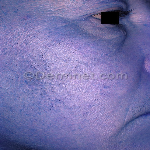

In [ ]:
images[0]

In [ ]:
labels[0]

'Rosacea & Acne'

In [ ]:
# Converting the 'labels' list into DataFrame
labels = pd.DataFrame(labels, columns=["class"],dtype=object)
labels

,class
0,Rosacea & Acne
1,Rosacea & Acne
2,Vitiligo
3,Normal skin
4,Rosacea & Acne
...,...
564,Rosacea & Acne
565,Rosacea & Acne
566,Vitiligo
567,Rosacea & Acne


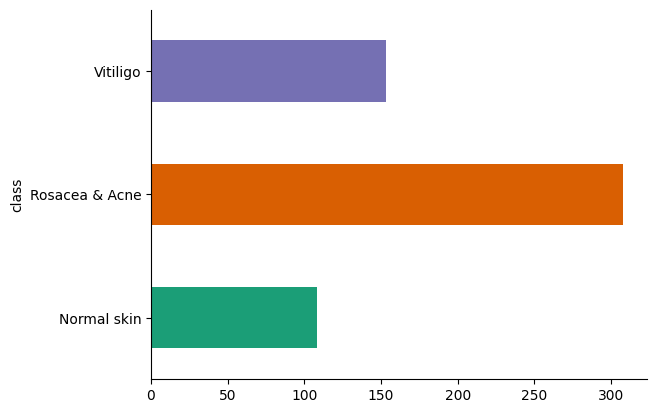

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
labels.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Storing the value counts of target variable
count=labels['class'].value_counts()
print(count)
print('* '*14)
count=labels['class'].value_counts(normalize=True)
print(count)

class
Rosacea & Acne    308
Vitiligo          153
Normal skin       108
Name: count, dtype: int64
* * * * * * * * * * * * * * 
class
Rosacea & Acne    0.541301
Vitiligo          0.268893
Normal skin       0.189807
Name: proportion, dtype: float64


In [ ]:
# Converting the pixel values into Numpy array
images= np.array(images)
images

array([[[[130, 151, 189],
         [125, 147, 183],
         [136, 159, 195],
         ...,
         [ 37,  48,  70],
         [ 39,  51,  75],
         [ 41,  53,  77]],

        [[132, 154, 190],
         [140, 162, 198],
         [142, 166, 201],
         ...,
         [ 43,  57,  74],
         [ 37,  51,  70],
         [ 39,  52,  74]],

        [[140, 164, 200],
         [140, 165, 199],
         [138, 164, 198],
         ...,
         [ 49,  67,  80],
         [ 45,  61,  76],
         [ 42,  58,  74]],

        ...,

        [[ 79, 101, 123],
         [ 77,  99, 121],
         [ 83, 105, 127],
         ...,
         [180, 204, 226],
         [188, 211, 233],
         [180, 203, 225]],

        [[ 73,  95, 116],
         [ 80, 101, 123],
         [ 83, 104, 126],
         ...,
         [183, 207, 229],
         [183, 206, 229],
         [179, 203, 225]],

        [[ 76,  94, 117],
         [ 81,  99, 122],
         [ 83, 101, 124],
         ...,
         [185, 211, 235],
        

In [ ]:
images.shape

(569, 150, 150, 3)

In [ ]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))

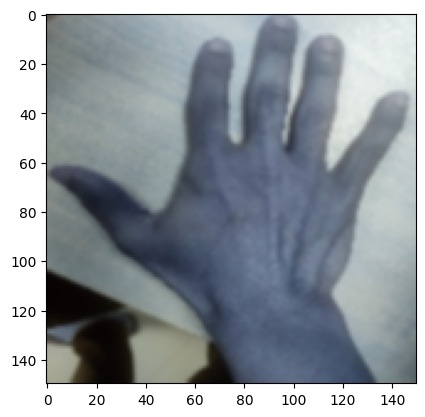

In [ ]:
plt.imshow(images_gb[14])

In [ ]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_gb),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)

In [ ]:
y_train.head()

,class
115,Vitiligo
73,Vitiligo
45,Rosacea & Acne
329,Rosacea & Acne
122,Normal skin


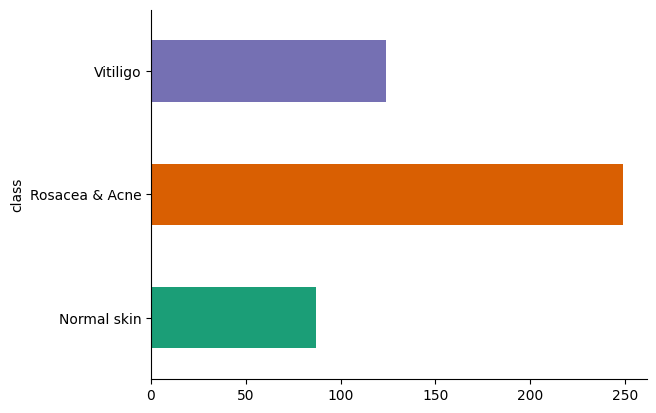

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
y_train.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(460, 150, 150, 3) (460, 1)
(52, 150, 150, 3) (52, 1)
(57, 150, 150, 3) (57, 1)


In [ ]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

In [ ]:
X_test_normalized

array([[[[0.04313726, 0.00784314, 0.01960784],
         [0.04313726, 0.00784314, 0.01960784],
         [0.04313726, 0.00784314, 0.01960784],
         ...,
         [0.02745098, 0.00392157, 0.02352941],
         [0.03137255, 0.00784314, 0.02352941],
         [0.03137255, 0.01176471, 0.02745098]],

        [[0.04313726, 0.00784314, 0.01960784],
         [0.04313726, 0.00784314, 0.01960784],
         [0.04313726, 0.00784314, 0.01960784],
         ...,
         [0.03529412, 0.00784314, 0.02745098],
         [0.03529412, 0.00784314, 0.02352941],
         [0.03921569, 0.01176471, 0.02352941]],

        [[0.04313726, 0.00784314, 0.01960784],
         [0.04313726, 0.00784314, 0.01960784],
         [0.04313726, 0.00784314, 0.01960784],
         ...,
         [0.04313726, 0.00784314, 0.02352941],
         [0.04313726, 0.00784314, 0.01960784],
         [0.04313726, 0.00784314, 0.01960784]],

        ...,

        [[0.04313726, 0.00784314, 0.01960784],
         [0.04313726, 0.00784314, 0.01960784]

In [ ]:
print(X_train_normalized.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(460, 150, 150, 3) (460, 1)
(52, 150, 150, 3) (52, 1)
(57, 150, 150, 3) (57, 1)


In [ ]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [ ]:
y_train_encoded

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]])

In [ ]:
y_val_encoded

array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [ ]:
print(X_train.shape,y_train_encoded.shape)

(460, 150, 150, 3) (460, 3)


In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(150,150,3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Flatten())
# Adding a fully connected dense layer with 100 neurons
model.add(Dense(256, activation='relu'))

model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer = 'adam', loss = tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 74, 74, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 37, 37, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 19, 19, 32)       

In [ ]:
history = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=40,
            verbose=2
)

Epoch 1/30
12/12 - 12s - loss: 1.0482 - accuracy: 0.5217 - val_loss: 0.8799 - val_accuracy: 0.5769 - 12s/epoch - 959ms/step
Epoch 2/30
12/12 - 12s - loss: 0.7978 - accuracy: 0.6217 - val_loss: 0.6256 - val_accuracy: 0.8462 - 12s/epoch - 985ms/step
Epoch 3/30
12/12 - 12s - loss: 0.5815 - accuracy: 0.7804 - val_loss: 0.3942 - val_accuracy: 0.8269 - 12s/epoch - 995ms/step
Epoch 4/30
12/12 - 11s - loss: 0.4814 - accuracy: 0.8152 - val_loss: 0.4120 - val_accuracy: 0.7885 - 11s/epoch - 943ms/step
Epoch 5/30
12/12 - 12s - loss: 0.4266 - accuracy: 0.8413 - val_loss: 0.3749 - val_accuracy: 0.8654 - 12s/epoch - 991ms/step
Epoch 6/30
12/12 - 11s - loss: 0.4319 - accuracy: 0.8565 - val_loss: 0.3634 - val_accuracy: 0.9038 - 11s/epoch - 919ms/step
Epoch 7/30
12/12 - 11s - loss: 0.3095 - accuracy: 0.9087 - val_loss: 0.3582 - val_accuracy: 0.8654 - 11s/epoch - 897ms/step
Epoch 8/30
12/12 - 12s - loss: 0.2243 - accuracy: 0.9261 - val_loss: 0.5796 - val_accuracy: 0.8846 - 12s/epoch - 976ms/step
Epoch 9/

In [ ]:
accuracy = model.evaluate(X_train_normalized, y_train_encoded, verbose=2)
training_accuracy_percentage = accuracy[1] * 100
formatted_accuracy = "{:.2f}".format(training_accuracy_percentage)
print("Model Accuracy:", formatted_accuracy, "%")

15/15 - 6s - loss: 0.0056 - accuracy: 0.9957 - 6s/epoch - 386ms/step
Model Accuracy: 99.57 %


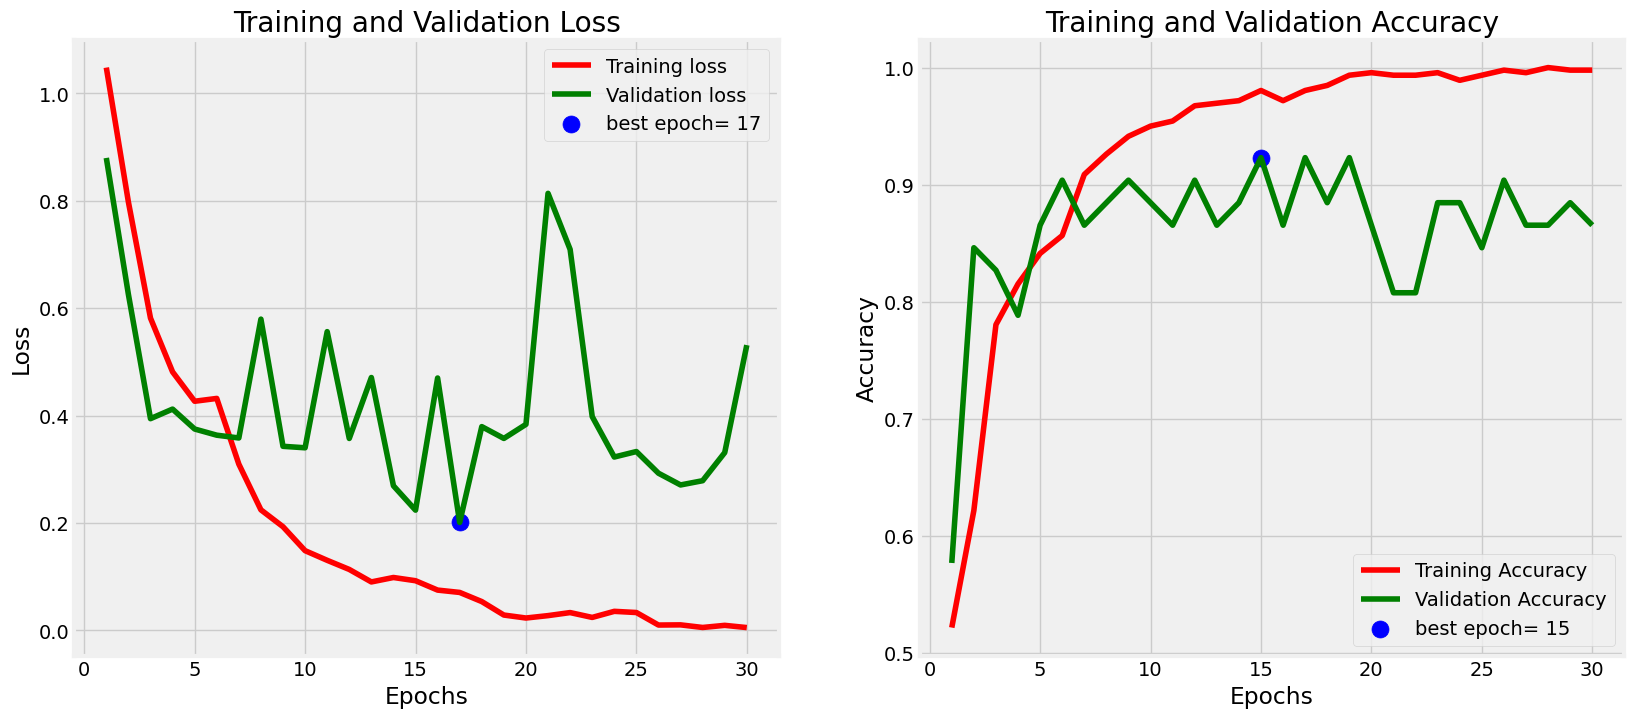

In [ ]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

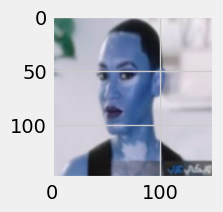

1/1 [==============================] - 0s 34ms/step
Predicted Label ['Vitiligo']
True Label Vitiligo


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[20])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[20].reshape(1,150,150,3)))))
print('True Label', enc.inverse_transform(y_test_encoded)[20])

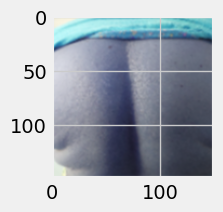

1/1 [==============================] - 0s 33ms/step
Predicted Label ['Normal skin']
True Label Normal skin


In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[11])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[11].reshape(1,150,150,3)))))
print('True Label', enc.inverse_transform(y_test_encoded)[11])

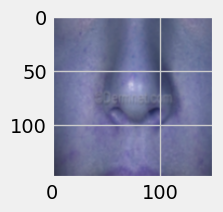

1/1 [==============================] - 0s 35ms/step
Predicted Label ['Rosacea & Acne']
True Label Rosacea & Acne


In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[22])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[22].reshape(1,150,150,3)))))
print('True Label', enc.inverse_transform(y_test_encoded)[22])

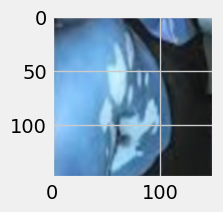

1/1 [==============================] - 0s 34ms/step
Predicted Label ['Vitiligo']
True Label Vitiligo


In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[1])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[1].reshape(1,150,150,3)))))
print('True Label', enc.inverse_transform(y_test_encoded)[1])

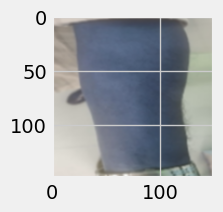

1/1 [==============================] - 0s 34ms/step
Predicted Label ['Normal skin']
True Label Normal skin


In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[14])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[14].reshape(1,150,150,3)))))
print('True Label', enc.inverse_transform(y_test_encoded)[14])

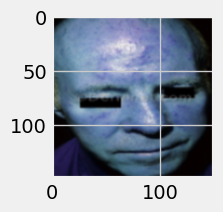

1/1 [==============================] - 0s 32ms/step
Predicted Label ['Rosacea & Acne']
True Label Rosacea & Acne


In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[6])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[6].reshape(1,150,150,3)))))
print('True Label', enc.inverse_transform(y_test_encoded)[6])

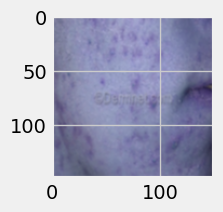

1/1 [==============================] - 0s 33ms/step
Predicted Label ['Rosacea & Acne']
True Label Rosacea & Acne


In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[56])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[56].reshape(1,150,150,3)))))
print('True Label', enc.inverse_transform(y_test_encoded)[56])

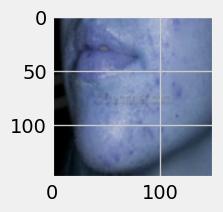

1/1 [==============================] - 0s 56ms/step
Predicted Label ['Rosacea & Acne']
True Label Rosacea & Acne


In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[53])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[53].reshape(1,150,150,3)))))
print('True Label', enc.inverse_transform(y_test_encoded)[53])

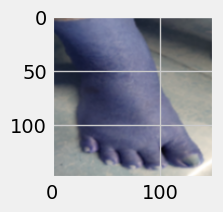

1/1 [==============================] - 0s 35ms/step
Predicted Label ['Normal skin']
True Label Normal skin


In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[31])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[31].reshape(1,150,150,3)))))
print('True Label', enc.inverse_transform(y_test_encoded)[31])

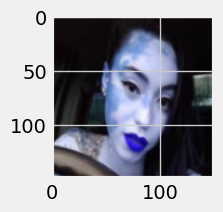

1/1 [==============================] - 0s 32ms/step
Predicted Label ['Vitiligo']
True Label Vitiligo


In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[25])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[25].reshape(1,150,150,3)))))
print('True Label', enc.inverse_transform(y_test_encoded)[25])